In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

sns.set_style("darkgrid") 
sns.set_palette("Set2")

In [2]:
# Load COVID-19 dataset
df = pd.read_csv("owid-covid-data.csv")

# Preview the dataset
df.head()

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,population,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million
0,AFG,Asia,Afghanistan,2020-01-05,0.0,0.0,NaN,0.0,0.0,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772,NaN,NaN,NaN,NaN
1,AFG,Asia,Afghanistan,2020-01-06,0.0,0.0,NaN,0.0,0.0,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772,NaN,NaN,NaN,NaN
2,AFG,Asia,Afghanistan,2020-01-07,0.0,0.0,NaN,0.0,0.0,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772,NaN,NaN,NaN,NaN
3,AFG,Asia,Afghanistan,2020-01-08,0.0,0.0,NaN,0.0,0.0,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772,NaN,NaN,NaN,NaN
4,AFG,Asia,Afghanistan,2020-01-09,0.0,0.0,NaN,0.0,0.0,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772,NaN,NaN,NaN,NaN


In [ ]:
print("\nTop 10 columns with most missing values:")
print(df.isnull().sum().sort_values(ascending=False).head(10))



Top 10 columns with most missing values:
weekly_icu_admissions                      418442
weekly_icu_admissions_per_million          418442
excess_mortality                           416024
excess_mortality_cumulative_absolute       416024
excess_mortality_cumulative                416024
excess_mortality_cumulative_per_million    416024
weekly_hosp_admissions                     404938
weekly_hosp_admissions_per_million         404938
icu_patients_per_million                   390319
icu_patients                               390319
dtype: int64


In [4]:
# Choose countries
countries = ['Kenya', 'India', 'United States']

# Filter dataset
df = df[df['location'].isin(countries)]

# Convert 'date' to datetime format
df['date'] = pd.to_datetime(df['date'])

df.head()

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,population,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million
173549,IND,Asia,India,2020-01-05,0.0,0.0,NaN,0.0,0.0,NaN,...,20.6,59.55,0.53,69.66,0.645,1417173120,NaN,NaN,NaN,NaN
173550,IND,Asia,India,2020-01-06,0.0,0.0,NaN,0.0,0.0,NaN,...,20.6,59.55,0.53,69.66,0.645,1417173120,NaN,NaN,NaN,NaN
173551,IND,Asia,India,2020-01-07,0.0,0.0,NaN,0.0,0.0,NaN,...,20.6,59.55,0.53,69.66,0.645,1417173120,NaN,NaN,NaN,NaN
173552,IND,Asia,India,2020-01-08,0.0,0.0,NaN,0.0,0.0,NaN,...,20.6,59.55,0.53,69.66,0.645,1417173120,NaN,NaN,NaN,NaN
173553,IND,Asia,India,2020-01-09,0.0,0.0,NaN,0.0,0.0,NaN,...,20.6,59.55,0.53,69.66,0.645,1417173120,NaN,NaN,NaN,NaN


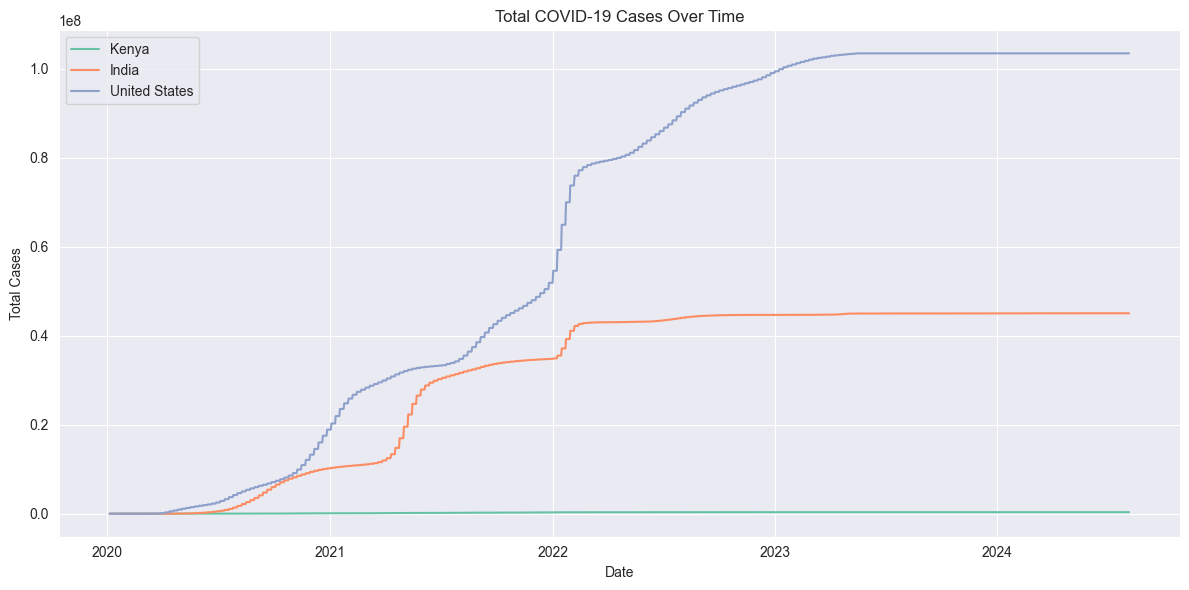

In [5]:
plt.figure(figsize=(12,6))
for country in countries:
    country_data = df[df['location'] == country]
    plt.plot(country_data['date'], country_data['total_cases'], label=country)

plt.title('Total COVID-19 Cases Over Time')
plt.xlabel('Date')
plt.ylabel('Total Cases')
plt.legend()
plt.tight_layout()
plt.show()

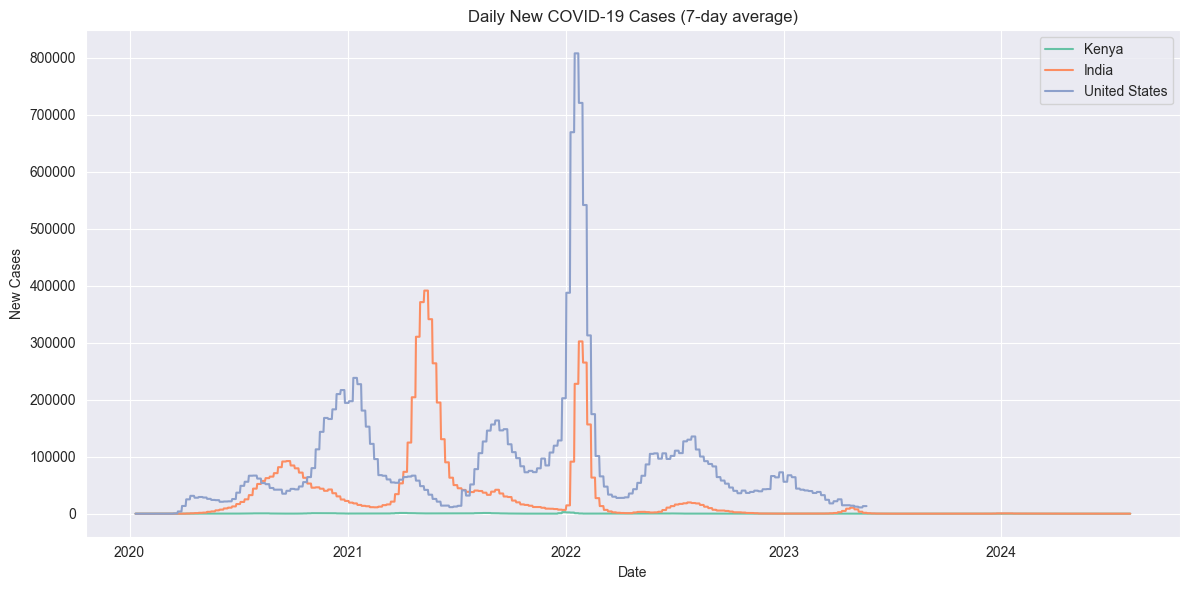

In [6]:
plt.figure(figsize=(12,6))
for country in countries:
    country_data = df[df['location'] == country]
    plt.plot(country_data['date'], country_data['new_cases'].rolling(7).mean(), label=country)

plt.title('Daily New COVID-19 Cases (7-day average)')
plt.xlabel('Date')
plt.ylabel('New Cases')
plt.legend()
plt.tight_layout()
plt.show()

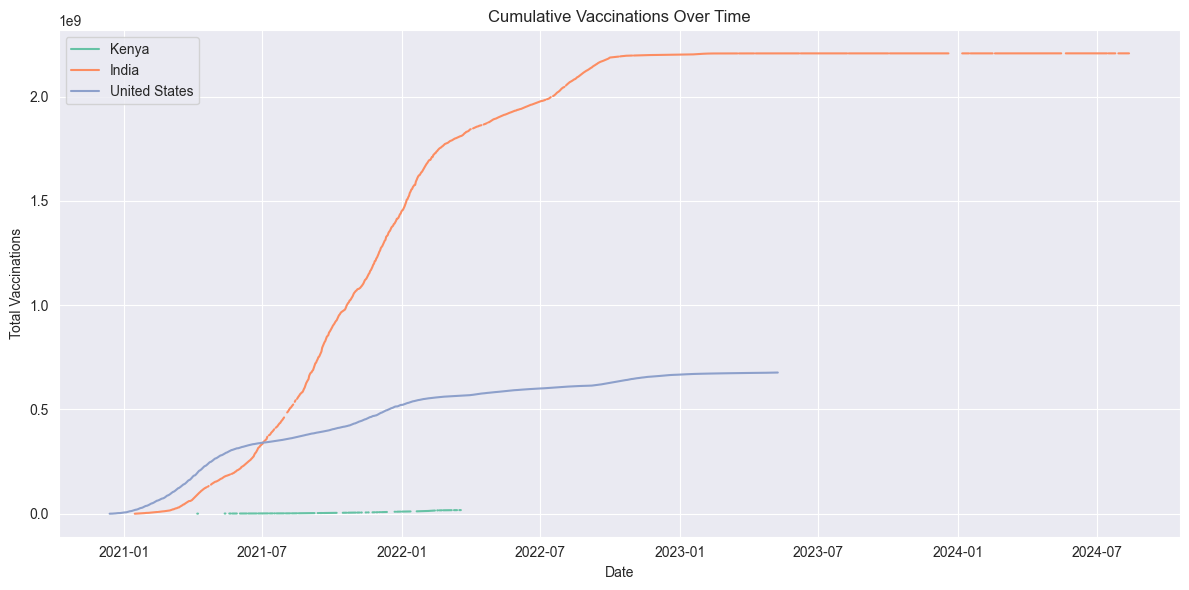

In [7]:
plt.figure(figsize=(12,6))
for country in countries:
    country_data = df[df['location'] == country]
    plt.plot(country_data['date'], country_data['total_vaccinations'], label=country)

plt.title('Cumulative Vaccinations Over Time')
plt.xlabel('Date')
plt.ylabel('Total Vaccinations')
plt.legend()
plt.tight_layout()
plt.show()

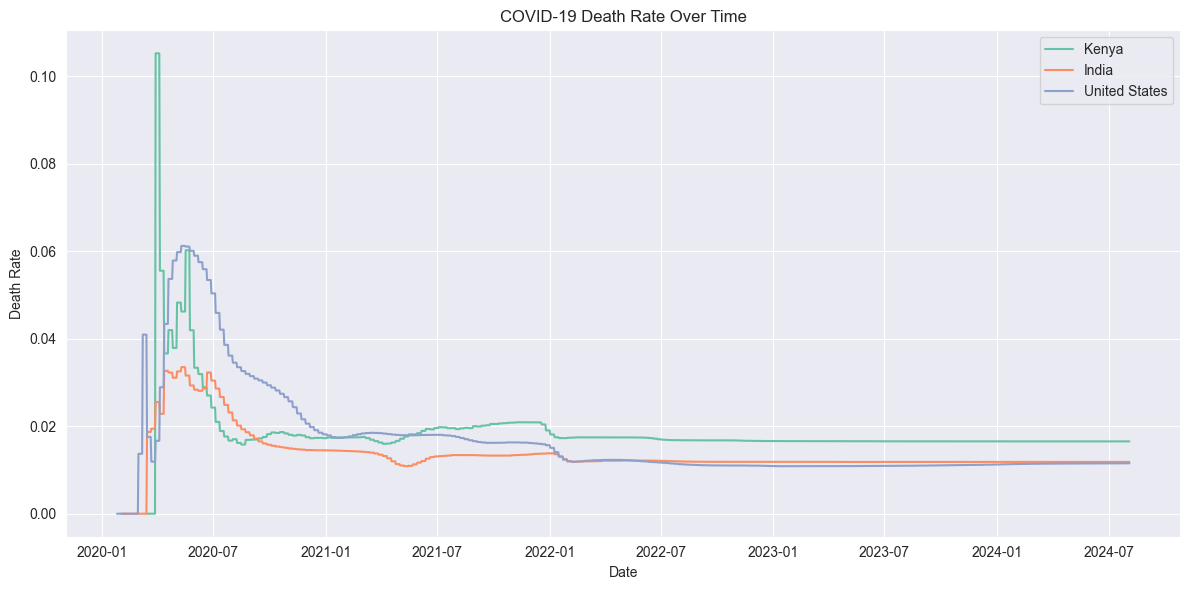

In [8]:
df['death_rate'] = df['total_deaths'] / df['total_cases']

plt.figure(figsize=(12,6))
for country in countries:
    country_data = df[df['location'] == country]
    plt.plot(country_data['date'], country_data['death_rate'], label=country)

plt.title('COVID-19 Death Rate Over Time')
plt.xlabel('Date')
plt.ylabel('Death Rate')
plt.legend()
plt.tight_layout()
plt.show()

### Summary Insights

- The United States consistently recorded the highest number of total cases.
- India's new cases peaked sharply around mid-2021.
- Kenya had a slower vaccine rollout compared to the U.S. and India.
- The death rate has gradually declined in all countries as vaccination increased.